<a href="https://colab.research.google.com/github/mapzine123/machine-running/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# 도미 데이터 준비
# http://blt.ly/bream_list
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

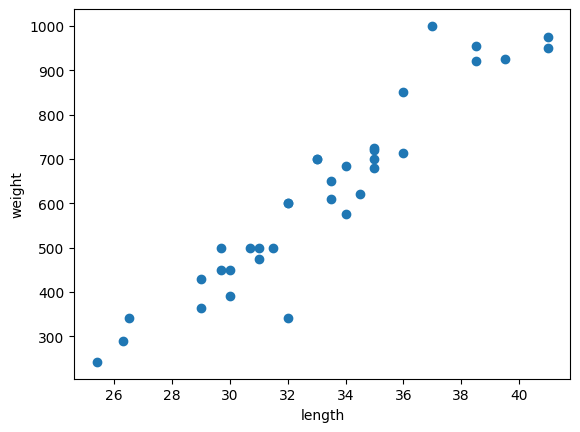

In [4]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [7]:
# 빙어 데이터 준비
# http://blt.ly/smelt_list
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

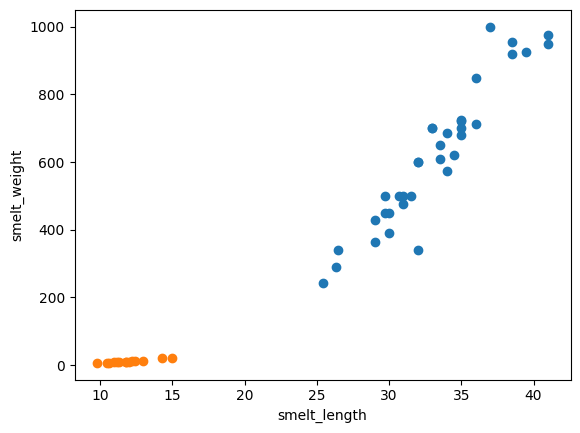

In [11]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel("smelt_length")
plt.ylabel("smelt_weight")
plt.show()

In [14]:
# 두 리스트 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight



[242.0,
 290.0,
 340.0,
 363.0,
 430.0,
 450.0,
 500.0,
 390.0,
 450.0,
 500.0,
 475.0,
 500.0,
 500.0,
 340.0,
 600.0,
 600.0,
 700.0,
 700.0,
 610.0,
 650.0,
 575.0,
 685.0,
 620.0,
 680.0,
 700.0,
 725.0,
 720.0,
 714.0,
 850.0,
 1000.0,
 920.0,
 955.0,
 925.0,
 975.0,
 950.0,
 6.7,
 7.5,
 7.0,
 9.7,
 9.8,
 8.7,
 10.0,
 9.9,
 9.8,
 12.2,
 13.4,
 12.2,
 19.7,
 19.9]

# 사이킷런을 사용하려면 이 데이터를 세로방향으로 늘어뜨린 2차원 리스트 만들어야함
# [[25.4 242.0],
# [26.3 290.0],
# [24.5 284.0],
#     ...
# [15.0 19.9]]



In [16]:
# 세로방향으로 늘어뜨린 2차원 리스트로 만들기
fish_data = [[l, w] for l, w in zip(length, weight)]


[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [17]:
# 정답 데이터 만들기
# 도미가 35개, 빙어가 14개
fish_target = [1] * 35 + [0] * 14
fish_target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [23]:
# 사이킷런 패키지의 KNeighmorsClassifier 사용
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

# 주어진 데이터로 학습
kn.fit(fish_data, fish_target)

# 정답률 확인
kn.score(fish_data, fish_target)

1.0

In [25]:
# 모델 예측
kn.predict([[15, 20]])

array([0])